In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

Logistic Regression based Prediction for CA40 Election

In [2]:
# import data
historic_data = pd.read_csv('Voter Turnout in CA40 Counties for Presidential Elections.csv')

# Clean up data
for column in historic_data.columns:
    if 'Percent' in column:
        historic_data[column] = historic_data[column].astype(str).str.replace('%', '').str.replace(',', '').astype(float)
    elif 'Vote' in column:
        historic_data[column] = historic_data[column].astype(str).str.replace(',', '').astype(int)

historic_data

,Year,County,Democratic_Vote,Democratic_Percent,Republican_Vote,Republican_Percent,Other_Party_Vote,Other_Party_Percent,Total_Amount_of_Votes
0,2020,Orange,814009,53.48,676498,44.44,31606,2.08,1522113
1,2020,Riverside,528340,52.98,449144,45.04,19672,1.98,997156
2,2020,San Bernardino,455859,54.20,366257,43.54,19014,2.26,841130
3,2016,Los Angeles,2464364,71.76,769743,22.41,200201,5.83,3434308
4,2016,Orange,609961,50.94,507148,42.35,80412,6.71,1197521
5,2012,Los Angeles,2216903,69.69,885333,27.83,78831,2.48,3181067
6,2012,Orange,512440,45.65,582332,51.87,27892,2.48,1122664
7,2008,Orange,549558,47.63,579064,50.19,25065,2.17,1153687
8,2004,Orange,419239,38.98,641832,59.68,14328,1.33,1075399
9,2000,Inyo,2652,33.93,4713,60.31,450,4.75,7815


In [3]:
# Use the groupby and sum to aggregate the votes
grouped_data = historic_data.groupby('Year').sum()

# Group x values of data points in array years
years = [2000, 2004, 2008, 2012, 2016, 2020]

# Obtain y values of data points from aggregated dataset grouped_data
democratic_votes = [grouped_data.loc[year, 'Democratic_Vote'] for year in years]
republican_votes = [grouped_data.loc[year, 'Republican_Vote'] for year in years]
other_votes = [grouped_data.loc[year, 'Other_Party_Vote'] for year in years]


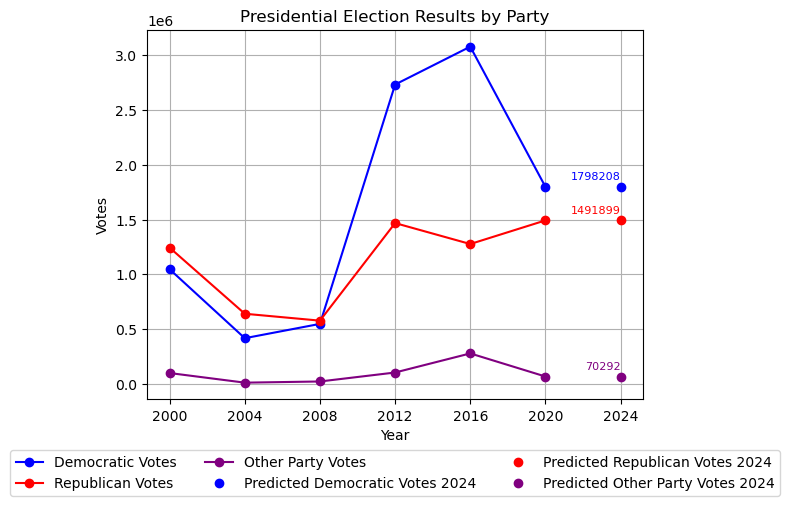

In [4]:
# Transform years into a 2D array
years = np.array(years).reshape(-1,1)

# Use logistic regression module in sklearn to obtain predicted value for democratic, republican and other party votes
model_dem = LogisticRegression().fit(years, democratic_votes)
model_rep = LogisticRegression().fit(years, republican_votes)
model_other = LogisticRegression().fit(years, other_votes)

year_2024 = np.array([[2024]])
pred_dem_2024 = model_dem.predict(year_2024)
pred_rep_2024 = model_rep.predict(year_2024)
pred_other_2024 = model_other.predict(year_2024)

# Include the predicted values in an array
predicted_values = [pred_dem_2024, pred_rep_2024, pred_other_2024]

# Plot all data with years as x axis and amount of votes as y axis
plt.plot(years, democratic_votes, marker='o', color='blue', label='Democratic Votes')
plt.plot(years, republican_votes, marker='o', color='red', label='Republican Votes')
plt.plot(years, other_votes, marker='o', color='purple', label='Other Party Votes')
plt.plot(2024, pred_dem_2024, 'o', color='blue', label='Predicted Democratic Votes 2024')
plt.plot(2024, pred_rep_2024, 'o', color='red', label='Predicted Republican Votes 2024')
plt.plot(2024, pred_other_2024, 'o', color='purple', label='Predicted Other Party Votes 2024')

# Display the amount of votes for each prediction
plt.annotate(f"{int(pred_dem_2024[0])}", (2024, pred_dem_2024[0]), textcoords="offset points", xytext=(0,5), ha='right', color='blue', fontsize=8)
plt.annotate(f"{int(pred_rep_2024[0])}", (2024, pred_rep_2024[0]), textcoords="offset points", xytext=(0,5), ha='right', color='red', fontsize=8)
plt.annotate(f"{int(pred_other_2024[0])}", (2024, pred_other_2024[0]), textcoords="offset points", xytext=(0,5), ha='right', color='purple', fontsize=8)

plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Presidential Election Results by Party')

# Format the range of x values to reflect US presidential elections
plt.xticks(range(2000, 2028, 4))

# Ensures that key is properly formatted below the graph
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.28), ncol=3)

plt.grid(True)
plt.show()

In [5]:
# Uses max function and if-else statement to state who the predicted president will be
def predict_president(dem_vote, rep_vote, other_vote):

    pop_party = max(dem_vote, rep_vote, other_vote)

    if(pop_party == dem_vote):
        print("Prediction:Kamala Harris was elected president in CA40.")
    elif(pop_party == rep_vote):
        print("Prediction:Donald Trump was elected president in CA40.")
    elif(pop_party == other_vote):
        print("Prediction:Neither Kamala Harris or Donald Trump was elected president in CA40.")

In [6]:
predict_president(pred_dem_2024, pred_rep_2024, pred_other_2024)

Prediction:Kamala Harris was elected president in CA40.


Result of 2024 Presidential Election in Orange, Riverside, and San Bernardino Counties

In [7]:
# import data
current_data = pd.read_csv('2024 Election Results CA40.csv')

# Clean up data
for column in current_data.columns:
    if 'Percent' in column:
        current_data[column] = current_data[column].astype(str).str.replace('%', '').str.replace(',', '').astype(float)
    elif 'Vote' in column:
        current_data[column] = current_data[column].astype(str).str.replace(',', '').astype(int)

current_data

,Year,County,Democratic_Vote,Democratic_Percent,Republican_Vote,Republican_Percent,Other_Party_Vote,Other_Party_Percent,Total_Amount_of_Votes,Percent_of_Votes_Reported
0,2024,Orange,669091,49.8,632785,47.1,42372,3.2,1344248,93.4
1,2024,Riverside,440068,49.1,432650,48.3,23830,2.7,896548,94.4
2,2024,San Bernardino,342031,49.5,329741,47.7,18929,2.7,690701,91.3


In [8]:
# Since not all the votes are reported, approximate representation of completed data represented in dataframe normalized_current_data
normalized_current_data = current_data.copy()
for column in normalized_current_data.columns:
    if 'Vote' in column:
        normalized_current_data[column] = normalized_current_data[column]*100/normalized_current_data['Percent_of_Votes_Reported']

for column in normalized_current_data.columns:
    #if "Percent_of_Votes_Reported" in column:
    #    normalized_current_data[column] = normalized_current_data[column]*100
    if 'Vote' in column:
        normalized_current_data[column] = normalized_current_data[column].astype(int)
    normalized_current_data['Total_Amount_of_Votes'] = normalized_current_data['Democratic_Vote'] + normalized_current_data['Republican_Vote'] + normalized_current_data['Other_Party_Vote']

normalized_current_data

,Year,County,Democratic_Vote,Democratic_Percent,Republican_Vote,Republican_Percent,Other_Party_Vote,Other_Party_Percent,Total_Amount_of_Votes,Percent_of_Votes_Reported
0,2024,Orange,716371,49.8,677500,47.1,45366,3.2,1439237,100
1,2024,Riverside,466173,49.1,458315,48.3,25243,2.7,949731,100
2,2024,San Bernardino,374623,49.5,361162,47.7,20732,2.7,756517,100


In [9]:
# Obtain sum of votes in each major party as well as the combinations of minor parties
actual_dem_2024 = normalized_current_data['Democratic_Vote'].sum()
actual_rep_2024 = normalized_current_data['Republican_Vote'].sum()
actual_other_2024 = normalized_current_data['Other_Party_Vote'].sum()
predict_president(actual_dem_2024, actual_rep_2024, actual_other_2024)

Prediction:Kamala Harris was elected president in CA40.


In [17]:
# Obtain percent error in each major party as well as the combinations of minor parties
dem_percentage_error = (abs(actual_dem_2024-pred_dem_2024)/actual_dem_2024)*100
rep_percentage_error = (abs(actual_rep_2024-pred_rep_2024)/actual_rep_2024)*100
other_percentage_error = (abs(actual_other_2024-pred_other_2024)/actual_other_2024)*100

#print("Percentage Error:\n Democrat:",round(dem_percentage_error[0],2),"%\n Republican",round(rep_percentage_error[0]),"%\n Other Parties",round(other_percentage_error[0]),"%")

print("Percent Error")
print("Democrat:",str(round(dem_percentage_error[0],2))+"%")
print("Republican:",str(round(rep_percentage_error[0],2))+"%")
print("Other Parties:",str(round(other_percentage_error[0],2))+"%")

Percent Error
Democrat: 15.48%
Republican: 0.34%
Other Parties: 23.04%
